In [3]:
import pandas as pd
import tensorflow as tf
import numpy as np
keras = tf.keras
import warnings
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [7]:
def balance_train_data(X, y, method=None):
    uniq, cts = np.unique(y, return_counts=True)
    
    if method == None:
        return X, y
    
    elif method == 'undersampling':
        rus = RandomUnderSampler()
        X_train, y_train = rus.fit_resample(X, y)
        return X_train, y_train
    
    elif method == 'oversampling':    
        ros = RandomOverSampler()
        X_train, y_train = ros.fit_resample(X, y)
        return X_train, y_train
    
    elif method == 'smote':
        smote = SMOTE()
        X_train, y_train = smote.fit_resample(X, y)
        return X_train, y_train
    
    elif method == 'both':
        smote = SMOTE(sampling_strategy=0.75)
        under = RandomUnderSampler(sampling_strategy=1)
        X_train, y_train = smote.fit_resample(X, y)
        X_train, y_train = under.fit_resample(X_train, y_train)
        return X_train, y_train

    else:
        print('Incorrect balance method')
        return



In [6]:
data = pd.read_csv('data/clean/Breyer.csv')
data['cleanText'] = data['cleanText'].fillna(' ')

X = data['cleanText'].to_numpy()
y = data['vote'].to_numpy()

In [46]:
kf = KFold(n_splits=5)

for train, test in kf.split(X):
    X_train, y_train = X[train], y[train]
    X_test, y_test = X[test], y[test]
    
    tfidf = TfidfVectorizer()
    train_vectors = tfidf.fit_transform(X_train)
    test_vectors = tfidf.transform(X_test)  
    
    train_vectors, y_train = balance_train_data(train_vectors, y_train, 'undersampling')
    
    
    break
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=32, 
                                 input_shape=(train_vectors.shape[1],), 
                                 activation='relu'))
    model.add(keras.layers.Dense(units=256,  
                                 activation='relu'))
    model.add(keras.layers.Dense(units=128,  
                                 activation='relu'))
    model.add(keras.layers.Dense(units=10, 
                                 activation='relu'))
    model.add(keras.layers.Dense(units=1, 
                                 activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='SGD',
                 metrics=[keras.metrics.Recall(), keras.metrics.Precision()])
    

In [56]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=32, 
                             input_shape=(train_vectors.shape[1],), 
                             activation='relu'))
model.add(keras.layers.Dense(units=256,  
                             activation='relu'))
model.add(keras.layers.Dense(units=128,  
                             activation='relu'))
model.add(keras.layers.Dense(units=10, 
                             activation='relu'))
model.add(keras.layers.Dense(units=1, 
                             activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='SGD',
            metrics=[keras.metrics.Recall(), keras.metrics.Precision()])

history = model.fit(train_vectors.toarray(), y_train, batch_size=32, epochs=50, 
          validation_data=(test_vectors.toarray(), y_test))

Epoch 1/50
29/29 [==============================] - 1s 28ms/step - loss: 0.6932 - recall_6: 0.6667 - precision_6: 0.4992 - val_loss: 0.6930 - val_recall_6: 0.0769 - val_precision_6: 0.5263
Epoch 2/50
29/29 [==============================] - 0s 4ms/step - loss: 0.6932 - recall_6: 0.5130 - precision_6: 0.4938 - val_loss: 0.6930 - val_recall_6: 0.1000 - val_precision_6: 0.2826
Epoch 3/50
29/29 [==============================] - 0s 4ms/step - loss: 0.6932 - recall_6: 0.1190 - precision_6: 0.5238 - val_loss: 0.6933 - val_recall_6: 0.4385 - val_precision_6: 0.3295
Epoch 4/50
29/29 [==============================] - 0s 5ms/step - loss: 0.6932 - recall_6: 0.3247 - precision_6: 0.4902 - val_loss: 0.6933 - val_recall_6: 0.6615 - val_precision_6: 0.3454
Epoch 5/50
29/29 [==============================] - 0s 5ms/step - loss: 0.6932 - recall_6: 0.9524 - precision_6: 0.5063 - val_loss: 0.6928 - val_recall_6: 0.0231 - val_precision_6: 0.3333
Epoch 6/50
29/29 [==============================] - 0s 5ms/

29/29 [==============================] - 0s 5ms/step - loss: 0.6924 - recall_6: 0.3420 - precision_6: 0.6930 - val_loss: 0.6941 - val_recall_6: 0.8154 - val_precision_6: 0.3668
Epoch 45/50
29/29 [==============================] - 0s 5ms/step - loss: 0.6925 - recall_6: 0.5238 - precision_6: 0.5500 - val_loss: 0.6943 - val_recall_6: 0.8692 - val_precision_6: 0.3705
Epoch 46/50
29/29 [==============================] - 0s 5ms/step - loss: 0.6925 - recall_6: 0.9545 - precision_6: 0.5081 - val_loss: 0.6937 - val_recall_6: 0.6154 - val_precision_6: 0.3556
Epoch 47/50
29/29 [==============================] - 0s 5ms/step - loss: 0.6924 - recall_6: 0.4351 - precision_6: 0.5809 - val_loss: 0.6940 - val_recall_6: 0.7846 - val_precision_6: 0.3709
Epoch 48/50
29/29 [==============================] - 0s 5ms/step - loss: 0.6925 - recall_6: 0.8290 - precision_6: 0.5261 - val_loss: 0.6937 - val_recall_6: 0.5769 - val_precision_6: 0.3456
Epoch 49/50
29/29 [==============================] - 0s 4ms/step - 

In [58]:
history.history

{'loss': [0.6932039856910706,
  0.693173348903656,
  0.6931782364845276,
  0.6931944489479065,
  0.6931533217430115,
  0.6931499242782593,
  0.6931477189064026,
  0.6931560039520264,
  0.6931273341178894,
  0.6931646466255188,
  0.6931251883506775,
  0.6930519938468933,
  0.692992627620697,
  0.6930351853370667,
  0.693051278591156,
  0.6930299401283264,
  0.692965030670166,
  0.6929804682731628,
  0.6929662227630615,
  0.6929081082344055,
  0.6929435729980469,
  0.6929077506065369,
  0.692875325679779,
  0.6928810477256775,
  0.692837119102478,
  0.6928051710128784,
  0.6929036974906921,
  0.692887008190155,
  0.692748486995697,
  0.6928029656410217,
  0.6927070617675781,
  0.6927188634872437,
  0.6926838159561157,
  0.6926969885826111,
  0.692747950553894,
  0.6926687955856323,
  0.6926488280296326,
  0.6925438046455383,
  0.6925819516181946,
  0.6926174163818359,
  0.6925970315933228,
  0.6925147175788879,
  0.6925130486488342,
  0.6924338340759277,
  0.6925483345985413,
  0.6924987

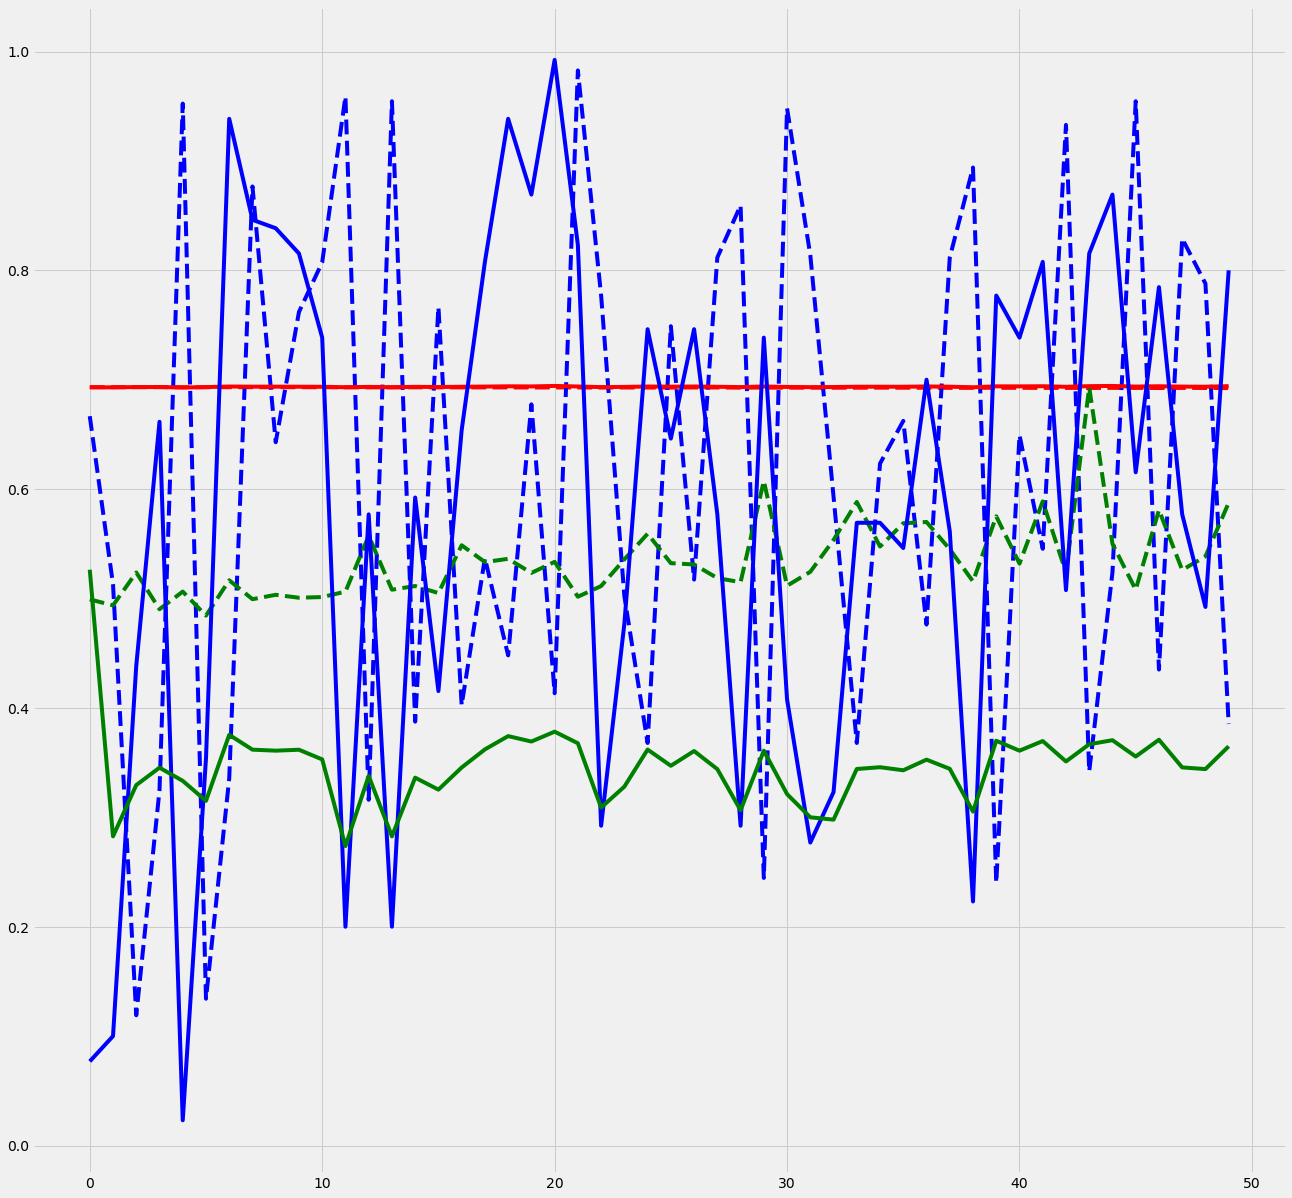

In [59]:
epochs = range(50)
loss = history.history['loss']
rec = history.history['recall_6']
prec = history.history['precision_6']

val_loss = history.history['val_loss']
val_rec = history.history['val_recall_6']
val_prec = history.history['val_precision_6']

fig, ax = plt.subplots(figsize=(20, 20))

ax.plot(epochs, loss, c='r', linestyle='--', label='training loss')
ax.plot(epochs, rec, c='b', linestyle='--', label='training recall')
ax.plot(epochs, prec, c='g', linestyle='--', label='training precision')
ax.plot(epochs, val_loss, c='r', linestyle='-', label='validation loss')
ax.plot(epochs, val_rec, c='b', linestyle='-', label='validation recall')
ax.plot(epochs, val_prec, c='g', linestyle='-', label='validation precision')